# Loss Functions

There are many different loss functions that can be used in training a machine learning model. In this notebook, we will explore some of the most common loss functions and their use cases.

requirements for designing a good loss function:
- it should be differentiable and convex (so that gradient descent can be used to find the minimum).
- it should large value when the error is big and small value when the error is small (ideally 0). This is because the loss function is used to measure the error of the model and we want to minimize the error.
- it should have large gradient values when the error is big and small gradient values when the error is small. This is because the gradient is used to update the model parameters and we want to make large updates when the error is big and small updates when the error is small.

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

## Regression Loss Functions
- mean squared error
- mean squared logarithmic error
- mean absolute error

**Mean Squared Error**
The mean squared error (MSE) or $l_2$ norm is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.

$$ L = \sum_i^n l(y_i, \hat y_i) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

where $y_i$ is the target value and $\hat{y}_i$ is the predicted value.

- Advantages
  - convex and differentiable -> only one global minima
  - it penalize the model more when the error is large
- Disadvantages
  - outliers are not handled well as outliers have a large error and the loss function penalizes large errors more than small errors
  - it penalizes overestimation and underestimation equally

**Mean Squared Logarithmic Error**
The mean squared logarithmic error (MSLE) is a variation of the mean squared error (MSE) where the squared difference between the logarithm of the predicted value and the logarithm of the target value is calculated.

$$ L = \sum_i^n l(y_i, \hat y_i) = \frac{1}{n}\sum_{i=1}^{n}(\ln(y_i + 1) - \ln(\hat{y}_i + 1))^2$$

where $y_i$ is the target value and $\hat{y}_i$ is the predicted value. This loss function is used when the target variable is skewed right (i.e. the target variable has a large number of small values and a small number of large values).

- Advantages
  - handle skewed right target variable better than MSE as it penalizes underestimation more than overestimation 
    - the target variable has a large number of small values and a small number of large values
    - the target variable is skewed right
    - the target variable has expoential growth such as population counts, bacteria counts, average sales of a commodity over a period of time, etc.
- Disadvantages


**Mean Absolute Error**
The mean absolute error (MAE) or $l_1$ norm is another loss function used for regression models. MAE is the sum of absolute differences between our target variable and predicted values.

$$ L = \sum_i^n l(y_i, \hat y_i) = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

where $y_i$ is the target value and $\hat{y}_i$ is the predicted value. 

- Advantages
  - outliers are handled better than MSE as it is less sensitive to outliers
- Disadvantages
  - computationally expensive as it uses modulus operator function 
  - maybe a local minima situation as the gradient is constant when the error is large

**Huber Loss**
The Huber loss is a combination of the MSE and MAE loss functions. It is less sensitive to outliers than the MSE loss function and less sensitive to small errors than the MAE loss function. The Huber loss is defined as:

$$ L = \sum_i^n l(y_i, \hat y_i) = \begin{cases}
  \frac{1}{2}(y_i - \hat y_i)^2 & |y_i - \hat y_i| \leq \delta\\
  \delta|y_i - \hat y_i| - \frac{1}{2}\delta^2 & |y_i - \hat y_i| > \delta
\end{cases}$$

- Advantages
  - outliers are handled better than MSE as it is less sensitive to outliers
  - local minima situation is handled better than MSE as it is less sensitive to small errors
- Disadvantages
  - need to tune the hyperparameter $\delta$ which is the threshold for the error. If $\delta$ is too small, the loss function is similar to MSE. If $\delta$ is too large, the loss function is similar to MAE.

**Mean Tweedie Deviance**
The mean tweedie deviance is a loss function used for regression models. It is a generalization of the mean squared error (MSE) and mean absolute error (MAE) loss functions. The mean tweedie deviance is defined as:

$$l(y_i, \hat y_i) = \begin{cases}
  (y_i - \hat y_i)^2 & p = 0\\
  2(y_i\ln \frac{y_i}{\hat y_i} - (y - \hat y)) & p = 1\\
  2(\ln \frac{\hat y_i}{y_i} + 
  \frac{y_i}{\hat y_i} - 1) & p = 2\\
  2(\frac{\max(y_i, 0)^{2-p}}{(1-p)(2-p)} - \frac{y_i\hat y_i^{1-p}}{1-p} + \frac{\hat y_i^{2-p}}{2-p}) & \text{otherwise}
\end{cases}
$$


In general, the larger the power $p$ is, the less weight is given to extreme deviations between the true and predicted values. 
The mean tweedie deviance can be used when the target variable is skewed right (i.e. the target variable has a large number of small values and a small number of large values).

Text(0.5, 1.0, 'Regression Loss Functions')

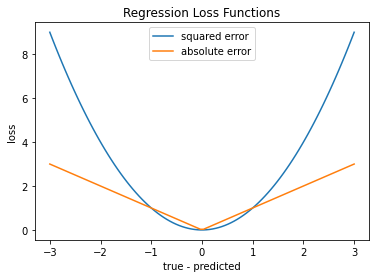

In [5]:
# plot regression loss function

error = np.linspace(-3, 3, 100)
se = error**2
ae = np.abs(error)

plt.figure()
plt.plot(error, se, label='squared error')
plt.plot(error, ae, label='absolute error')
plt.legend()
plt.xlabel('true - predicted')
plt.ylabel('loss')
plt.title('Regression Loss Functions')

**Summary**

Difference between MSE and MAE:
- squared term in MSE penalizes large errors more than MAE, therefore, MSE is more sensitive to outliers than MAE.
  - when the data set has a large number of outliers, MAE is a better choice.
- MSE is differentiable at all points, but MAE is not differentiable at $y_i = \hat{y}_i$.
  - when the model is trained using gradient descent, MSE is easier to work with than MAE.
- When the error is small (e.g., around 0), the gradient of MSE is smaller than that of MAE. When the error is large (e.g., far from 0), the gradient of MSE is larger than that of MAE.
  - when the error is small, the model parameters are updated slowly using MSE than using MAE.
  - when the error is large, the model parameters are updated quickly using MSE than using MAE.

## Binary Classification Loss Functions
- Ideal Loss Function for Classification
- Cross Entropy
- Hinge Loss

**Ideal Loss Function for Classification**
This is also known as the 0-1 loss function. The loss is 0 if the predicted value is equal to the target value and 1 if the predicted value is not equal to the target value.

$$ L = \sum_i^n l(y_i, \hat y_i) = \sum_i^n \delta(y_i \ne \hat y_i) $$
where $\delta$ is the indicator function. when $y_i \ne \hat y_i$, $\delta(y_i \ne \hat y_i) = 1$ and when $y_i = \hat y_i$, $\delta(y_i \ne \hat y_i) = 0$.

The ideal loss function for classification is not used in practice because it is not differentiable. The gradient of the ideal loss function is 0 everywhere except at the decision boundary where the gradient is undefined.

**Cross Entropy**

From information theory, we have information defined as

$$
h(x) = -\ln p(x)
$$ 
The negative is used to ensure that the information is always positive or zero.

The entropy is defined as the expected information carried by the random variable $x$.
$$
H(x) = -\sum_i p(x_i) \ln p(x_i)
$$

or in the continuous case
$$
H(x) = -\int p(x) \ln p(x) dx
$$


Cross-entropy uses the entropy idea to calculate the number of total bits to represent an average event from one distirbution to another distribution. 
If $p(x)$ is the true distribution and $q(x)$ is the predicted distribution, then the cross entropy of $q(x)$ from $p(x)$ is the number of additional bits to represent an event using $q(x)$ instead of $p(x)$.
The cross entropy $H(p,q)$ is defined as

$$
H(p,q) = -\sum_i p(x_i) \ln q(x_i)
$$

***Cross-entropy is not KL divergence.***
KL divergence is a measure of how one probability distribution is different from another probability distribution, and also known as relative entropy.
- cross-entropy: Average number of total bits to represent an event from Q instead of P.
- KL divergence: Average number of additional bits to represent an event from Q instead of P.

$$ 
KL(p||q) = H(p, q) - H(p) = -\int p(x) \ln q(x) dx - (-\int p(x) \ln p(x) dx) = -\int p(x) \ln \frac{q(x)}{p(x)} dx
$$

Cross entropy is used as a loss function for classification models. The cross entropy loss function for binary classification formulated as (0-1 labels) is defined as:

$$
L = \sum_i^n l(y_i, \hat y_i) = \sum_i^n -y_i \ln \hat y_i - (1 - y_i) \ln (1 - \hat y_i)
$$

The derivate of the cross entropy loss function wrt parameters for a linear model is the same as the squared error loss function for regression models. Therefore, it is widely used in classification models.

**Hinge Loss**

Hinge loss is a loss function used for classification models with target set {-1, 1}. It is defined as:

$$
L = \sum_i^n l(y_i, \hat y_i) = \sum_i^n \max(0, 1 - y_i \hat y_i)
$$

Since this loss function typically used for target within (-1,1), when used in training neural networks, the output layer could be a `tanh` activation function, or simply no activation function.


Text(0, 0.5, 'loss')

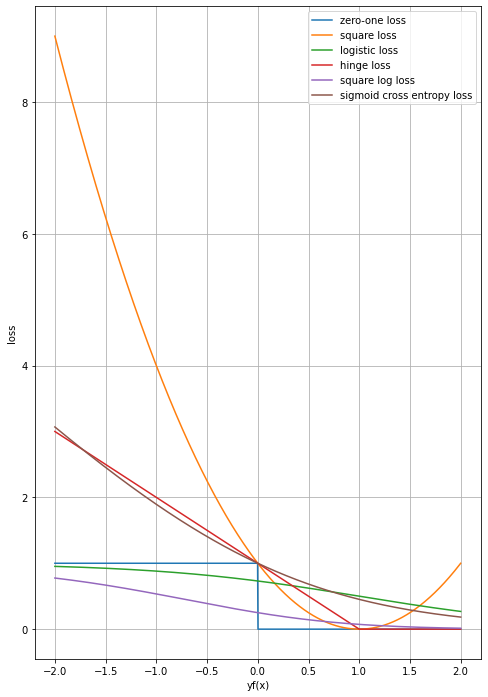

In [15]:
# generate plots for comparing classification loss functions
# this uses label (1,-1) instead of (0,1)
def sigmoid(x):
    return 1./(1 + np.exp(-x))
def zero_one_loss(x):
    return 1.*(x < 0)
def sigmoid_cross_entropy(x):
    return np.log(1 + np.exp(-x))/np.log(2)

error = np.linspace(-2, 2, 1000)

zero_one = zero_one_loss(error)
square = (1-error)**2
logistic = 1./(1 + np.exp(-(1-error)))
hinge = np.maximum(0, 1 - error)
square_log = (1 - sigmoid(error))**2

plt.figure(figsize=(8,12))
plt.plot(error, zero_one, label='zero-one loss')
plt.plot(error, square, label='square loss')
plt.plot(error, logistic, label='logistic loss')
plt.plot(error, hinge, label='hinge loss')
plt.plot(error, square_log, label='square log loss')
plt.plot(error, sigmoid_cross_entropy(error), label='sigmoid cross entropy loss')
plt.legend()
plt.grid()
plt.xlabel('yf(x)')
plt.ylabel('loss')

## Multi-Class Classification Loss Functions

- cross entropy

**Cross Entropy**

Cross entropy for multi-class classification is defined as:

$$
L = \sum_i^n l(y_i, \hat y_i) = \sum_i^n \sum_j^m -y_i^{(j)} \ln \hat y_{i}^{(j)}
$$

where $y_{i}^{(j)}$ is the indicator function for the $j$th class of the $i$th sample. $y_{i}^{(j)} = 1$ if the $i$th sample belongs to the $j$th class, and $y_{i}^{(j)} = 0$ otherwise.

## Customized Modification of Loss Functions

- weighted loss function

**Weighted Loss Function**
Sometimes, we need to modify the loss function to fit our needs. For example, we may want to penalize false positives more than false negatives. In this case, we can use a weighted loss function.

$$
L = \sum_i^n w_i l(y_i, \hat y_i)
$$

where $w_i$ is the weight for the $i$th sample. If $w_i > 1$, the loss function is penalizing the $i$th sample more than the other samples. If $w_i < 1$, the loss function is penalizing the $i$th sample less than the other samples. If $w_i = 1$, the loss function is the same as the original loss function.


## Regularization in Loss Functions

Regularization is needed when model is overfitting.
- L1 regularization adds the absolute value of the weights to the loss function.
- L2 regularization adds the square of the weights to the loss function.

**Comparison**
- L1 regularization is more robust to outliers than L2 regularization. 
- L1 regularization is more likely to result in sparse weights than L2 regularization.
  - L1 regularization leads to 0 weights for some features. L2 regularization leads to small non-spare weights for some features.
  - L1 regularization is used for feature selection.
